# Recurrent Neural Network that mimics a dynamic system

In [1]:
! pip3 install sympy matplotlib

In [2]:
import sympy as sym
from sympy.abc import s, t, y, x, y, z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [4]:
from DynamicSystem import DynamicModel, DynamicProcess

In [5]:
G = 5*(s+1)/((s+3)*(s+2))
dynamic_model = DynamicModel(G)

In [6]:
dynamic_process = DynamicProcess(dynamic_model, 100)
dynamic_process.model

(5*s + 5)/((s + 2)*(s + 3))

### Example of system responses for different inputs 

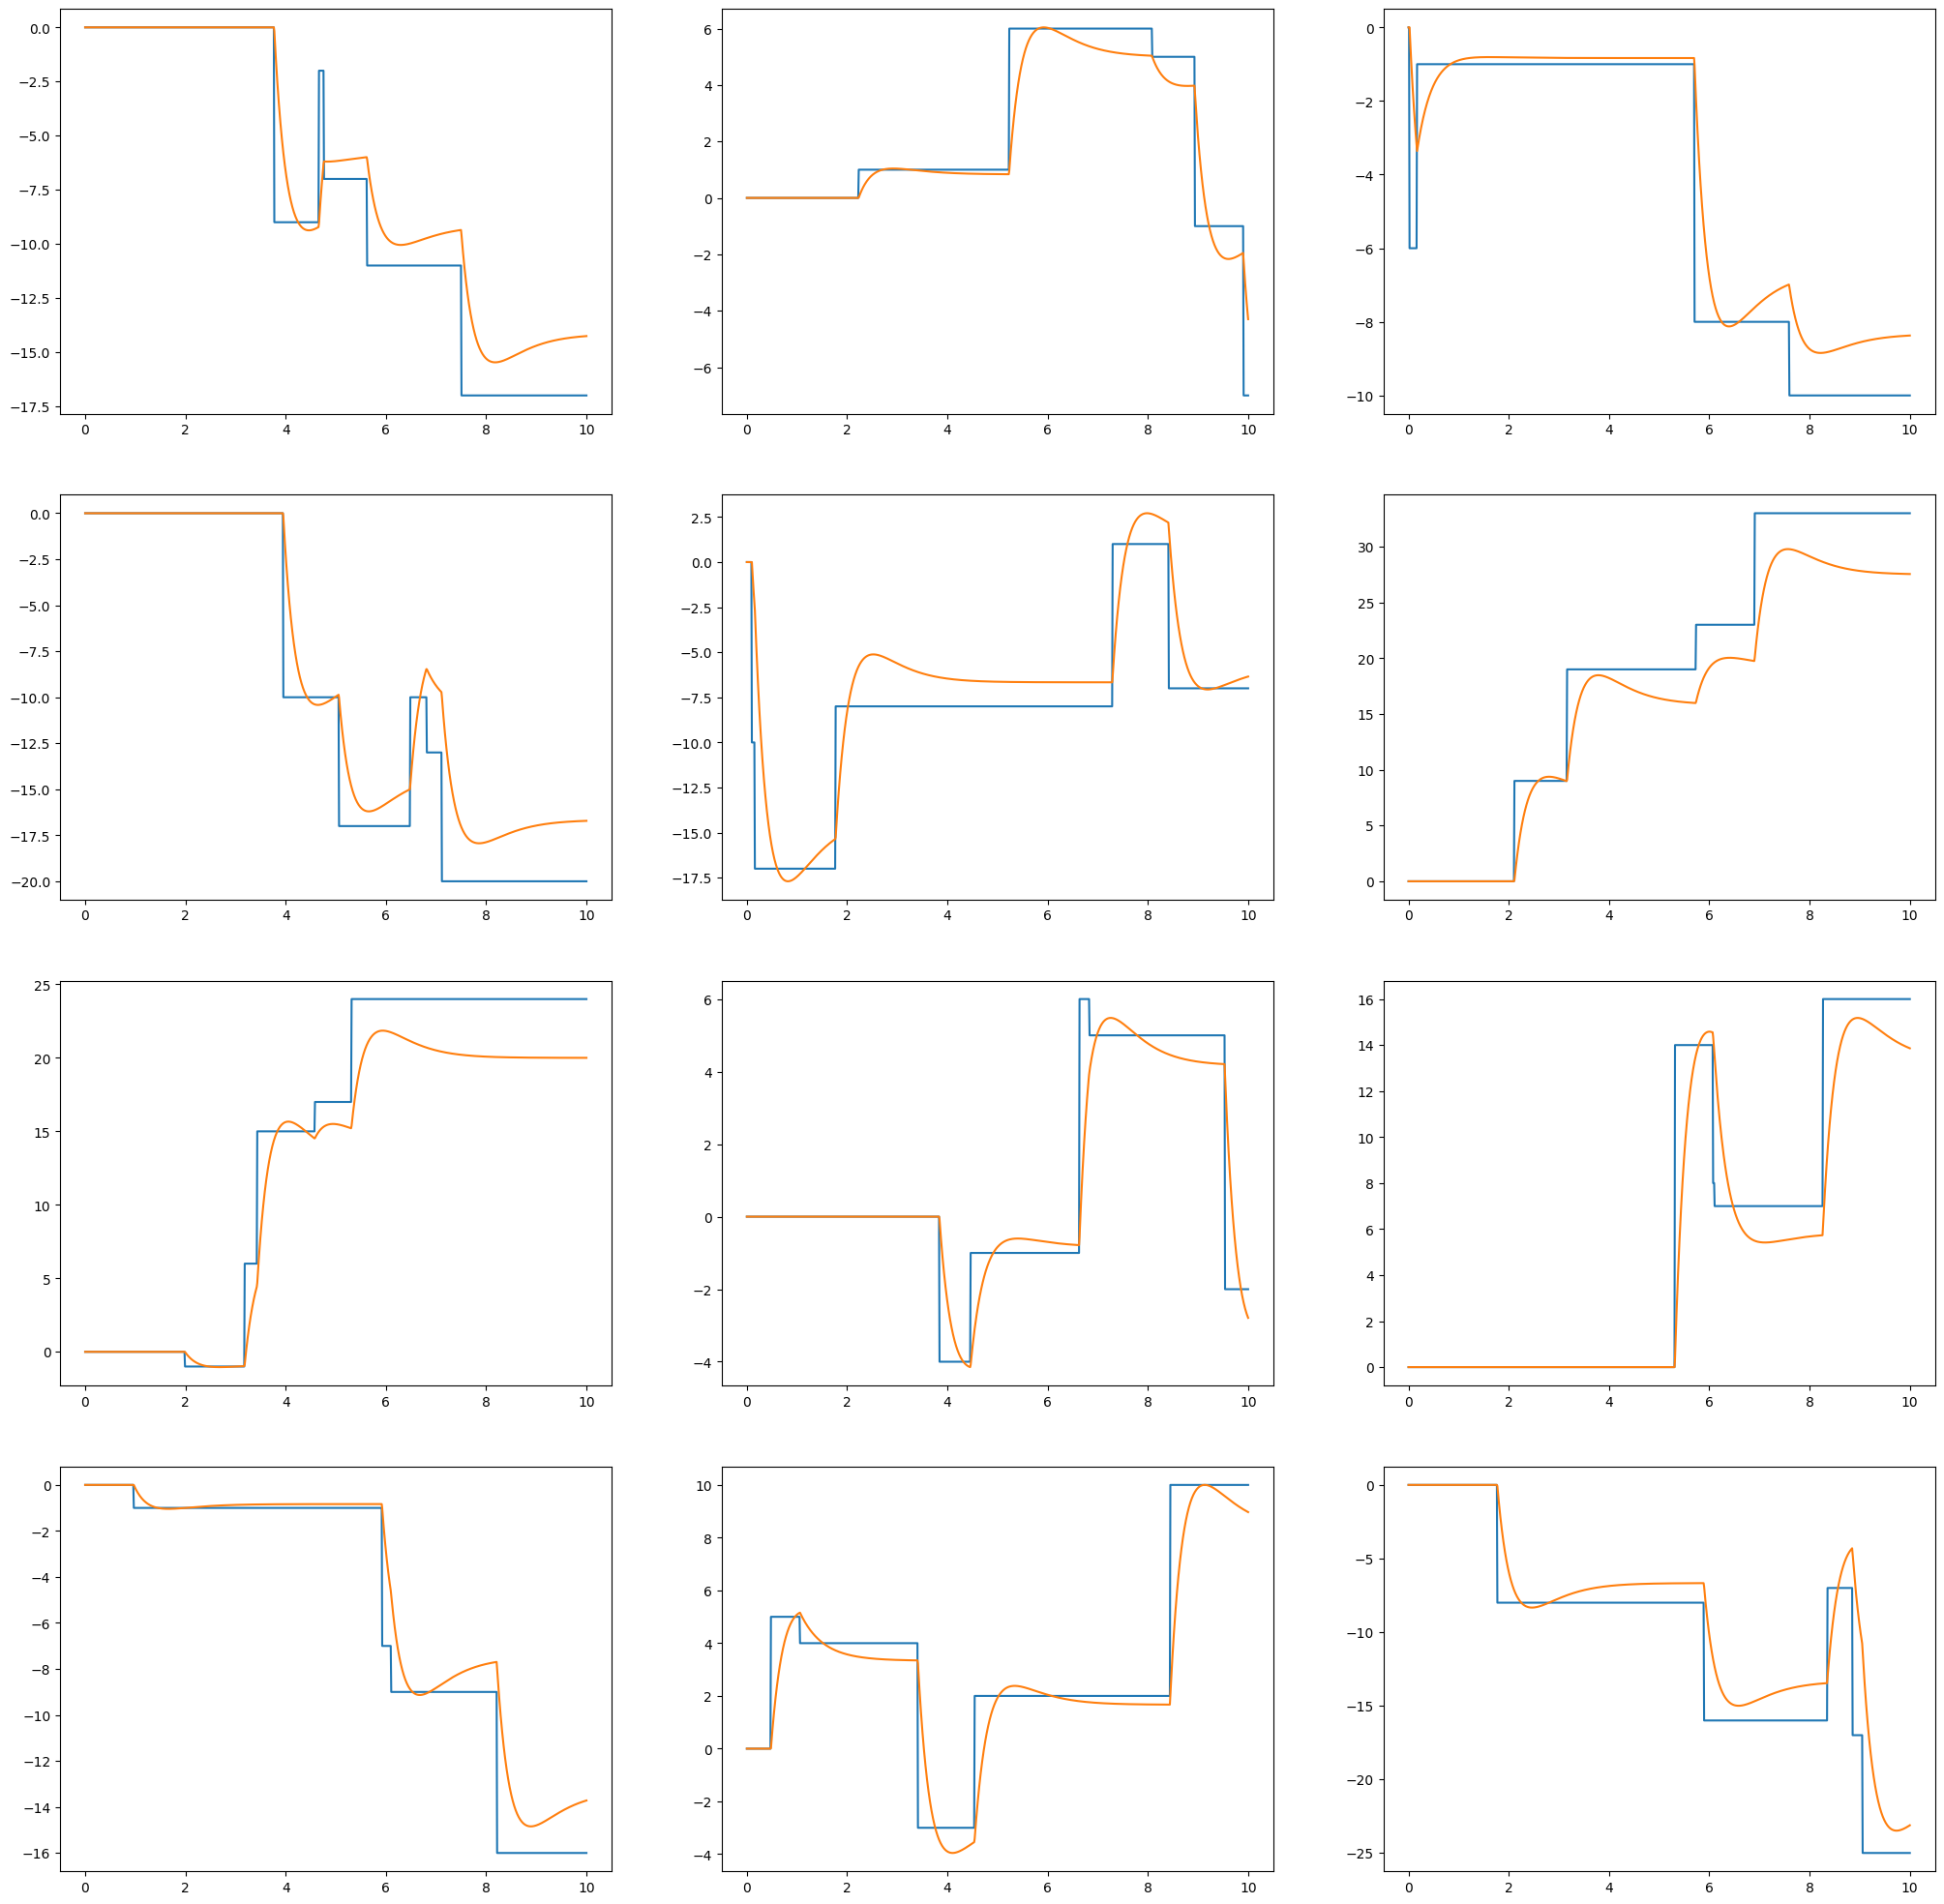

In [13]:
plt.figure(figsize=(25,25))
for i in range(12):
    t, u, y = dynamic_process.generate_time_series(10, 1000, new_inputs=True)
    plt.subplot(4,3,i+1)
    plt.plot(t, u)
    plt.plot(t, y)
plt.show()

## Create Dataset

In [14]:
import pandas as pd

In [19]:
n = 3
for i in range(n):
    t, u, y = dynamic_process.generate_time_series(10, 1000, new_inputs=True)
    data = {'t':t, 'u':u, 'y':y}
    df = pd.DataFrame(data)
    df.to_csv(f'dataset/{i}.csv')

In [ ]:
class BatchGenerator(keras.utils.Sequence):
    """_summary_
    Helps to iterate over the dataset
    Args:
        keras (_type_): _description_
    """
    
    def __init__(self, batch_size, input_paths):
        self.batch_size = batch_size
        self.input_paths = input_paths
    
    def __len__(self):
        return len(self.input_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, output) that corresponds to batch idx"""
        
        i = idx * self.batch_size
        batch_input_image_paths = self.input_img_paths[i : i + self.batch_size]
        batch_output_image_paths = self.output_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_image_paths):
            img = np.array(keras.preprocessing.image.img_to_array(load_img(path, target_size=self.img_size)))
            x[j] = img/255.0
            
        y = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_output_image_paths):
            img = np.array(keras.preprocessing.image.img_to_array(load_img(path, target_size=self.img_size)))
            y[j] = img/255.0
            
        return x, y

## Recurrent Neural Network

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def rnn_model():
    
    pass

## Training